# Installing the Dataset
It is a textual dataset that contains emails and a column specify whether given email is spam or not. The objective is to build a classification model that able to classify unseen emails correctly.

In [1]:
!pip install -q kaggle
from google.colab import files
files.upload()
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d shantanudhakadd/email-spam-detection-dataset-classification

Saving kaggle (1).json to kaggle (1).json
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/shantanudhakadd/email-spam-detection-dataset-classification
License(s): other
100% 211k/211k [00:00<00:00, 406kB/s]
100% 211k/211k [00:00<00:00, 405kB/s]


# Importing necessary libraries

In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,classification_report
import tensorflow as tf

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


#Unzipping downloaded dataset

In [3]:
!unzip /content/email-spam-detection-dataset-classification.zip

Archive:  /content/email-spam-detection-dataset-classification.zip
  inflating: spam.csv                


# Loading dataset by using pandas

In [4]:
df = pd.read_csv('/content/spam.csv',encoding = 'latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# Data Explorations and cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [8]:
df = df.iloc[:,:2]

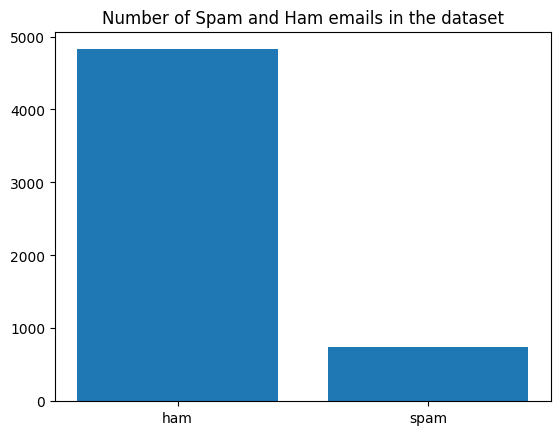

In [9]:
plt.bar(x = df['v1'].value_counts().index,
        height = df['v1'].value_counts().values)
plt.title('Number of Spam and Ham emails in the dataset')
plt.show()

In [10]:
df['target'] = df['v1'].map({'ham':0,'spam':1})

In [11]:
df.drop('v1',inplace=True,axis=1)

In [13]:
lemmatizer = WordNetLemmatizer()

In [14]:
stops = stopwords.words('english') + list(string.punctuation)
df['Text'] = df['v2'].map(lambda x: ' '.join([lemmatizer.lemmatize(i.lower(), pos='v') for i in word_tokenize(x) if i not in stops]))


In [15]:
df['v2'][108]

'I know! Grumpy old people. My mom was like you better not be lying. Then again I am always the one to play jokes...'

In [16]:
df['Text'][108]

'i know grumpy old people my mom like better lie then i always one play joke ...'

In [17]:
df.drop('v2',inplace=True,axis=1)

In [18]:
df.shape

(5572, 2)

In [19]:
df = df.drop_duplicates().reset_index(drop=True)

In [20]:
df.shape

(5137, 2)

#Splitting data into Train and Test sets

In [21]:
X_train,X_test,y_train,y_test = train_test_split(df['Text'],
                                                 df['target'],
                                                 test_size = 0.2,
                                                 random_state = 42,
                                                 shuffle = True,
                                                 stratify = df['target'])

In [22]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((4109,), (1028,), (4109,), (1028,))

In [40]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Converting the text into vectors

In [42]:
vectorizer = TfidfVectorizer()

vectorizer.fit(X_train)

TfidfVectorizer()

In [108]:
tf_idf_X_train = vectorizer.transform(X_train).toarray()
tf_idf_X_test = vectorizer.transform(X_test).toarray()

# Building Logistic Regression Model and Training it

In [109]:
lr = LogisticRegression(penalty='l2')

In [110]:
lr.fit(tf_idf_X_train,y_train)

LogisticRegression()

# Predictions and evaluating trained model

In [111]:
pred = lr.predict(tf_idf_X_train)

In [112]:
confusion_matrix(pred,y_train)

array([[3598,  124],
       [   5,  382]])

In [113]:
accuracy_score(pred,y_train)

0.9686055001216841

In [114]:
f1_score(pred,y_train)

0.8555431131019037

In [64]:
precision_score(pred,y_train),recall_score(pred,y_train)

(0.7549407114624506, 0.9870801033591732)

In [194]:
lr_test_pred = lr.predict(tf_idf_X_test)

In [196]:
print(classification_report(lr_test_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       939
           1       0.69      0.98      0.81        89

    accuracy                           0.96      1028
   macro avg       0.84      0.97      0.89      1028
weighted avg       0.97      0.96      0.96      1028



# Building Sequential Model by using TensorFlow

In [170]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(tf_idf_X_train.shape[1],)),
    tf.keras.layers.Dense(units = 512,activation='linear'),
    tf.keras.layers.Dense(units = 256,activation='linear'),
    tf.keras.layers.Dense(units = 1, activation = 'sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [165]:
model.summary()

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)                  │ (None, 6749)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_66 (Dense)                     │ (None, 512)                 │       3,456,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_67 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_68 (Dense)                     │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,587,585 (13.69 MB)

 Trainable params: 3,587,585 (13.69 MB)

 Non-trainable params: 0 (0.00 B)

In [172]:
model.compile(
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.001),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = ['accuracy']
)

In [173]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        min_delta=0.001,
        patience=5,
        mode='auto'
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.1,
        patience=5,
        min_delta=0.001
    )
]

In [174]:
BATCH_SIZE = 4

#Training

In [176]:
history = model.fit(x = tf_idf_X_train,
                    y = y_train,
                    batch_size = BATCH_SIZE,
                    epochs = 100,
                    shuffle=True,
                    callbacks = callbacks,
                    validation_split= 0.15
                    # validation_data =test_dataset
                    )

Epoch 1/100
873/873 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8926 - loss: 0.2241 - val_accuracy: 0.9028 - val_loss: 0.2175 - learning_rate: 0.0010
Epoch 2/100
873/873 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9102 - loss: 0.2045 - val_accuracy: 0.9141 - val_loss: 0.2105 - learning_rate: 0.0010
Epoch 3/100
873/873 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9155 - loss: 0.1976 - val_accuracy: 0.9190 - val_loss: 0.2032 - learning_rate: 0.0010
Epoch 4/100
873/873 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9108 - loss: 0.1992 - val_accuracy: 0.9222 - val_loss: 0.1960 - learning_rate: 0.0010
Epoch 5/100
873/873 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9165 - loss: 0.1926 - val_accuracy: 0.9238 - val_loss: 0.1892 - learning_rate: 0.0010
Epoch 6/100
873/873 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9181 - loss: 0.1797 - val_accuracy: 0.9254 - val_loss: 0.1829 - learning_rate: 0.0010
Epoch 7/100
873/873 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9224 - loss: 0.

# Evaluation

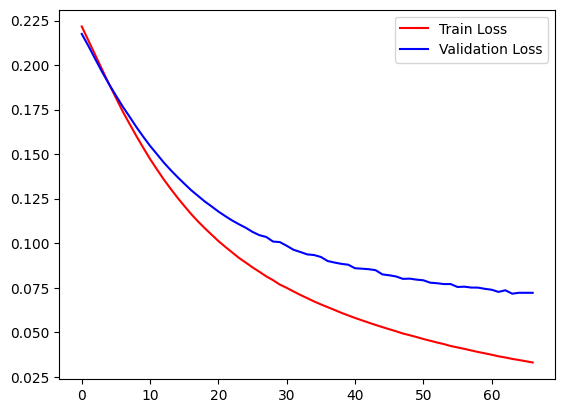

In [181]:
plt.plot(history.history['loss'],label='Train Loss',color='red')
plt.plot(history.history['val_loss'],label='Validation Loss',color='blue')
plt.legend()

plt.show()

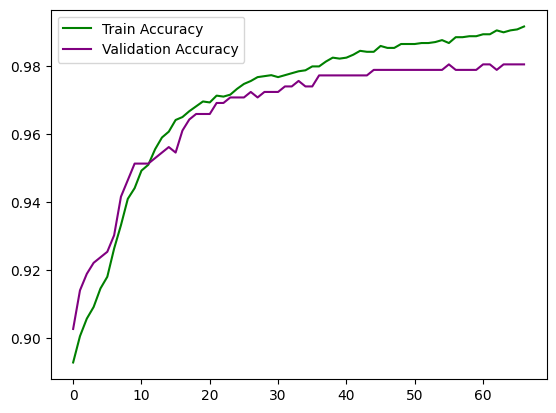

In [182]:
plt.plot(history.history['accuracy'],label='Train Accuracy',color='green')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy',color='purple')
plt.legend()

plt.show()

#Predictions

In [186]:
preds = [1 if i >0.5 else 0 for i in model.predict(tf_idf_X_train)]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [188]:
confusion_matrix(preds,y_train)

array([[3595,   33],
       [   8,  473]])

In [190]:
test_preds = [1 if i >0.5 else 0 for i in model.predict(tf_idf_X_test)]
confusion_matrix(test_preds,y_test)

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


array([[898,  18],
       [  4, 108]])

In [193]:
print(classification_report(test_preds,y_test))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       916
           1       0.86      0.96      0.91       112

    accuracy                           0.98      1028
   macro avg       0.93      0.97      0.95      1028
weighted avg       0.98      0.98      0.98      1028



#End
It is clear that the neural network model outperformed Logistic Regression. Logistic Regression had a poor precision score on the test data. However, NN has improved this.